# ORIE 5355/INFO 5370 HW 1: Survey Weighting

 - Name: Atmika Pai
 - Net-id: aap253
 - Date: 9/17/2024
 - Late days used for this assignment: 0
 - Total late days used (counting this assignment): 0
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/AM1x5qEnLCvxsgrJ7


We have marked questions in <font color='green'> green </font>. Please put answers in the default color. You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2023/assignments/). In that link, we also give some tips on exporting your notebook to PDF, which is required for GradeScope submission. 

A few notes about this homework:
1. This homework is purposefully heavy in using the Pandas package. Being able to explore data is an essential data science skill that you'll use throughout this class and your career -- even if the polling/politics application is not interesting to you. I encourage you to practice Pandas and learn how to use it well. Your code will NOT be graded on efficiency.
2. Some of the questions can be interpreted in multiple ways. That is always true in data science. You'll need to make judgment calls for what analysis to do. For the homework, you'll still receive full points for any "reasonable" choice. Also feel free to ask questions on EdStem. 

Note: We sometimes provide sample images of what your output should look like. These are for clarification of what we are looking for. The numbers in the images are not necessarily correct, and your output does not need to look exactly like the images.

# Conceptual component

### 1) Reading

<font color='green'> Please read Sections 3 and 4 (pages 6-13) here: https://www.nber.org/system/files/working_papers/w20830/w20830.pdf, and answer the following questions.

<font color='green'> Please summarize the sections in no more than two sentences. 

*Section 3 critiques eBay's reputation system, noting that potential buyers may struggle to interpret the numbers, as feedback is skewed, with the median seller having a 100% positive score, and this does not accurately reflect seller quality since many bad experiences go unreported. The authors introduce the "effective percent positive" (EPP) score, the the ratio of positive feedback to total transactions.*

*Section 4 discusses the dataset: a 10% random sample of new eBay users from 2011 who made a purchase within 30 days was tracked until May 31, 2014, resulting in over 15 million transactions. Next, the authors construct EPP scores at each separate transaction and  note the imbalance between one-time and frequent buyers.*

<font color='green'> Do you think it's a problem that most ratings are positive? If so, why? Answer in no more than four sentences. Please incorporate concepts discussed in class in your answer. 

*Yes, it can be problematic if most ratings are positive, as this skews the perception of seller quality. Professor Nikhil attributes this positive skew, or inflation of scores, to a type of measurement error, where the "quality" scale does not align well with the "rating" scale. This causes information asymmetry, as buyers struggle to differentiate between high and low-quality eBay sellers. The positive skew can also make our sample unrepresentative, leading to differential non-response.*

### 2) Personal reflection

<font color='green'> Think back to a time that you trained a model on data from people or gathered opinions via a survey (an informal one is fine). If you have not done that before, you may answer these questions about an article in the news that reported on public opinions or a model that you think might be in deployment at a company or organization with which you interact (for example, Amazon, google maps, etc)

<font color='green'> Briefly summarize the scenario in no more than two sentences. 

*I often rely on restaurant scores and reviews on Google Maps to decide where to eat, especially when scouting for new places. I base my decision on the number of stars a restaurant has out of 5, the number of people who reviewed it, and by reading the first 2-3 reviews.* 

<font color='green'> What was the construct that you cared about/wanted to measure? What was the measurement (numerical data)? In what ways did the measurement not match the construct you cared about? Answer in no more than 4 sentences.  

*The construct I want to measure is the quality of the restaurant in terms of food and ambiance and whether I should visit it. Google Maps has people give a rating out of 5, which is the measurement (numerical data), and it can be supplemented with a text review of the restaurant.*

*In class, we discussed how ratings are hard to interpret qualitatively - while 1/5 stars signals a terrible experience and 5/5 a great one, it is unclear what 4 stars represent.*

<font color='green'> What selection biases/differential non-response issues occurred and how did it affect your measurement? (If your answer is "None," explain exactly why you believe the assumptions discussed in class were met). Answer in no more than 3 sentences. 

*There may be selection bias as those with extreme positive or negative experiences are more likely to leave reviews, skewing the overall rating.*

*Frequent reviewers may also have different expectations or standards, meaning their feedback might not accurately reflect the general population.* 

*An implicit pressure to avoid leaving bad reviews could result in underreporting of negative experiences, further distorting the measurement.*

<font color='green'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

*Professor Garg's thesis indicates using "relative" ratings instead of "absolutes", so replacing the 5-star system with rating options like "terrible", "mediocre", "good" can give more interpretable results.*

*Restaurants can give incentives to people to leave a review on Google Maps to mitigate differential non-response. As a result, the sample will be a better representation of the population average.*

*Google could try to weigh google ratings by demographic information of reviewers, but this seems like a hefty undertaking and in the gray area of data use practices.*

# Programming component

<font color='green'> In this part of the homework, we provide you with data from a poll in Florida before the 2016 Presidential election in the United States. We also provide you with (one pollster's) estimates of who will vote in the 2016 election, made before the election. You will use this data and apply the weighting techniques covered in class.

## Preliminaries to load packages and data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/Users/atmikapai/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dfpoll = pd.read_csv('polling_data_hw1.csv') # raw polling data
dfpoll.head()

,candidate,age,gender,party,race,education
0,Someone else,30-44,Male,Independent,White,College
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School


In [3]:
dfdemographic = pd.read_csv('florida_proportions_hw1.csv') # proportions of population
dfdemographic.head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.388,party,NaN,Democrat,NaN
1,0.399,party,NaN,Republican,NaN
2,0.213,party,NaN,Independent,NaN
3,0.446,gender,NaN,Male,NaN
4,0.554,gender,NaN,Female,NaN


In [4]:
dfdemographic.tail()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
112,0.034,race,education,Hispanic,Some College
113,0.028,race,education,Hispanic,College
114,0.011,race,education,Other,High School
115,0.011,race,education,Other,Some College
116,0.015,race,education,Other,College


`dfdemographic` contains estimates of likely voters in Florida in 2016. When `Demographic_Type_2` is `NaN`, the row refers to just the marginal population percentage of the group in `Demographic_1` of type `Demographic_Type_1`. When it is not `NaN`, the row has the joint distribution of the corresponding demographic groups.

For example, row 0 means that 38.8% of the electorate is from the Democrat party. Row 113 means that 2.8% of the electorate is Hispanic AND graduated college. 

## Part A: Raw visualization

<font color='green'> Here, we'll visualize whether the respondents in the poll match the likely voter estimates. Create a scatter-plot where each point represents one Demographic group (for example, people who identify as Independent: party-Independent), where the X axis is the `Electoral_Proportion` in `dfdemographic`, and the Y axis is the proportion in `dfpoll` (Hint: you will need to calculate this yourself). 

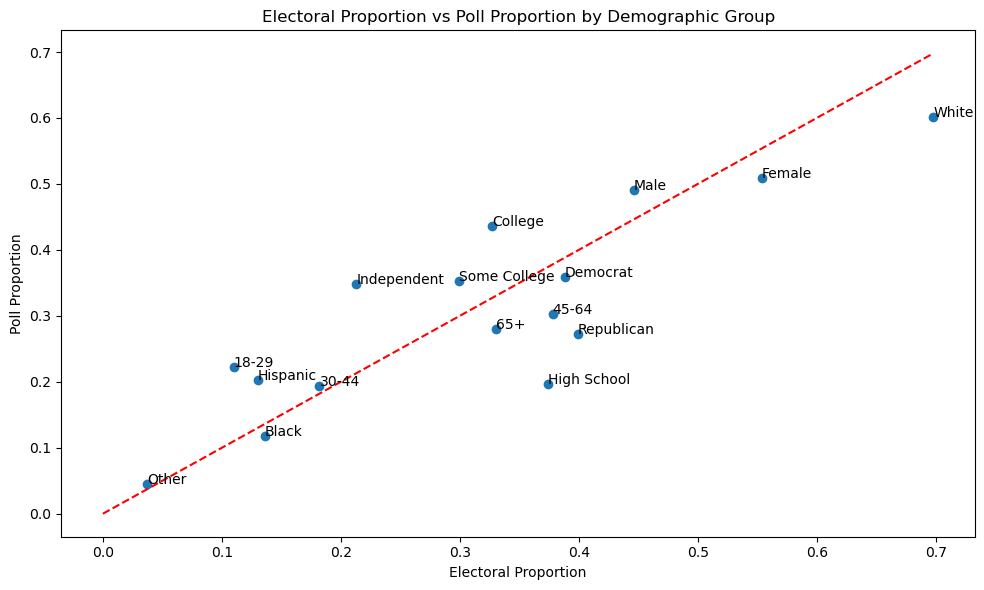

In [5]:
demographic_columns = ['party', 'gender', 'race', 'education', 'age']

all_demographics = []

for column in demographic_columns:
    counts = dfpoll[column].value_counts(normalize=True).reset_index()
    counts.columns = ['Demographic', 'Poll_Proportion']
    counts['Demographic_Type'] = column
    counts['Demographic'] = counts['Demographic'].astype(str)
    all_demographics.append(counts)
    

dfpoll_proportions = pd.concat(all_demographics, ignore_index=True)
dfpoll_proportions = dfpoll_proportions[['Poll_Proportion', 'Demographic_Type', 'Demographic']]

# Merge with dfdemographic
merged_df = pd.merge(
    dfdemographic[dfdemographic['Demographic_Type_2'].isna()], 
    dfpoll_proportions, 
    left_on=['Demographic_Type_1', 'Demographic_1'], 
    right_on=['Demographic_Type', 'Demographic'], 
    how='left'
)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Electoral_Proportion'], merged_df['Poll_Proportion'])

plt.xlabel('Electoral Proportion')
plt.ylabel('Poll Proportion')
plt.title('Electoral Proportion vs Poll Proportion by Demographic Group')


max_value = max(merged_df['Electoral_Proportion'].max(), merged_df['Poll_Proportion'].max())
plt.plot([0, max_value], [0, max_value], 'r--')

for i, row in merged_df.iterrows():
    plt.annotate(row['Demographic_1'], (row['Electoral_Proportion'], row['Poll_Proportion']))

plt.tight_layout()
plt.show()

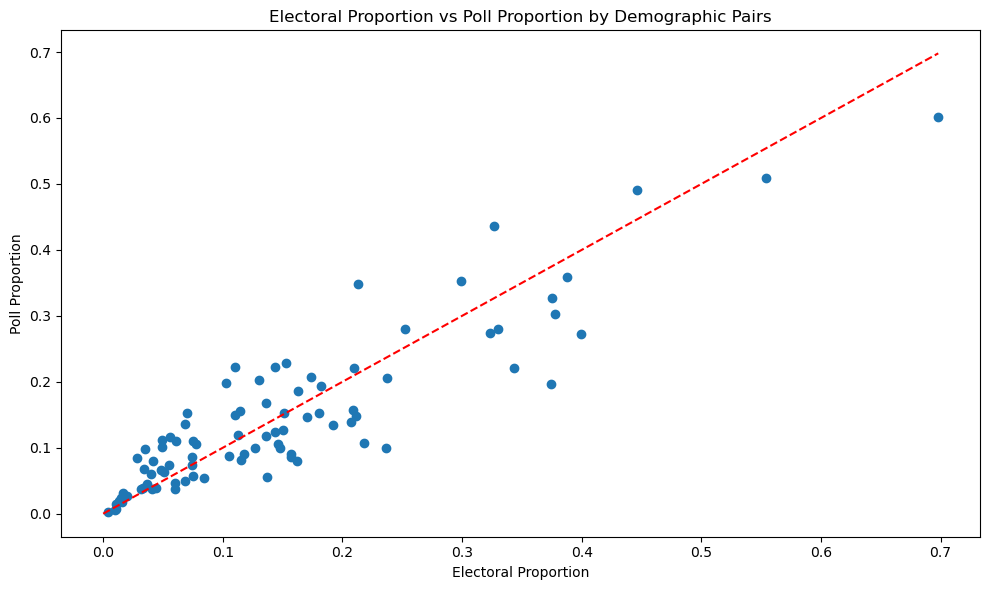

In [19]:
from itertools import combinations

import pandas as pd
import numpy as np
from itertools import combinations

all_demographics_pairs = []

for pair in combinations(demographic_columns, 2):
    counts = dfpoll.groupby(list(pair)).size().reset_index(name='Counts')
    counts['Poll_Proportion'] = counts['Counts'] / counts['Counts'].sum()
    
    counts['Demographic_Type_1'] = pair[0]
    counts['Demographic_Type_2'] = pair[1]
    counts['Demographic_1'] = counts[pair[0]].astype(str)
    counts['Demographic_2'] = counts[pair[1]].astype(str)
    
    counts['Type'] = 'Combination'
    
    all_demographics_pairs.append(counts[['Poll_Proportion', 'Demographic_Type_1', 'Demographic_1', 'Demographic_Type_2', 'Demographic_2', 'Type']])

for column in demographic_columns:
    
    counts_single = dfpoll[column].value_counts(normalize=True).reset_index()
    counts_single.columns = ['Demographic_1', 'Poll_Proportion']
    counts_single['Demographic_Type_1'] = column
    counts_single['Demographic_Type_2'] = np.nan  
    counts_single['Demographic_2'] = np.nan 

    counts_single['Type'] = 'Single'
    
    all_demographics_pairs.append(counts_single[['Poll_Proportion', 'Demographic_Type_1', 'Demographic_1', 'Demographic_Type_2', 'Demographic_2', 'Type']])

dfpoll_proportions_pairs = pd.concat(all_demographics_pairs, ignore_index=True)

dfpoll_proportions_pairs = dfpoll_proportions_pairs.drop_duplicates()


merged_df = pd.merge(
    dfdemographic, 
    dfpoll_proportions_pairs, 
    left_on=['Demographic_Type_1', 'Demographic_Type_2', 'Demographic_1', 'Demographic_2' ], 
    right_on=['Demographic_Type_1', 'Demographic_Type_2', 'Demographic_1', 'Demographic_2' ], 
    how='left'
)

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Electoral_Proportion'], merged_df['Poll_Proportion'])

plt.xlabel('Electoral Proportion')
plt.ylabel('Poll Proportion')
plt.title('Electoral Proportion vs Poll Proportion by Demographic Pairs')


max_value = max(merged_df['Electoral_Proportion'].max(), merged_df['Poll_Proportion'].max())
plt.plot([0, max_value], [0, max_value], 'r--')



plt.tight_layout()
plt.show()



<font color='green'> `dfdemographic` tells us the true proportion of each demographic group in the entire population, the calculated proportion from dfpoll tells us the proportion of each demographic group represented in the poll. For a poll to be representative of the population, ideally we would want the latter to be the same as the former. However, this is hard to achieve in practice.


In your view, which group is most over-represented? Most under-represented? Why? Answer in no more than 3 sentences. There are multiple reasonable definitions of "over" or "under" represented; any choice is fine as long as you justify your answer.</font>

In [7]:
merged_df['Difference'] = merged_df.Electoral_Proportion - merged_df.Poll_Proportion
merged_df[(merged_df.Difference == merged_df.Difference.max()) 
          | (merged_df.Difference == merged_df.Difference.min())]

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Poll_Proportion,Type,Difference
2,0.213,party,NaN,Independent,NaN,0.348328,Single,-0.135328
13,0.374,education,NaN,High School,NaN,0.197232,Single,0.176768


*I created a 'Difference' column that calculates the difference between population proportions and polling data proportions.*

*People with a high school education are underrepresented in the poll (37.4% in the population vs. 19.7% in the poll). Conversely, Independent party supporters are overrepresented (21.3% in the population vs. 34.8% in the poll).*

## Part B: Weighting

<font color='green'> For this question, we'll ignore people who answered anything but "Hillary Clinton" or "Donald Trump."


You'll notice that some of the groups in the polling data ("refused") do not show up in the population percentages. For the questions that require weighting by demographics, ignore those respondents.



### 1) Raw average

<font color='green'> Below, report the "raw polling average," the percentage of people "Hillary Clinton" divided by the number who answered either Hillary or Trump.

In [8]:
counts = dfpoll['candidate'].value_counts()
print(counts)
hillary_win = counts['Hillary Clinton']/(counts['Hillary Clinton']+counts['Donald Trump']);
print("Hillary win:", round(hillary_win*100, 2))

candidate
Hillary Clinton    393
Donald Trump       327
Do not know         78
Will not vote       39
Someone else        30
Name: count, dtype: int64
Hillary win: 54.58


In [9]:
#For question part C-2
clinton_estimates = []
clinton_estimates.append(hillary_win)

### 2) Single dimensional marginal weighting (on just 1 demographic type)

<font color='green'> For each demographic type separately -- age, gender, party, race, and education -- weight the poll by just that demographic type, in accordance to the population proportions given. Report the resulting poll results, and briefly (at most 3 sentences) describe what you observe.


For example, when weighted by race, you'll report:

Weighted by race --- Clinton: 0.531, Trump: 0.469

(your results might be different due to rounding/precision, but we do not expect the difference to be large)


In [10]:
demographic_types = ['party', 'gender', 'race', 'education', 'age']
dfpoll_trump_clinton = dfpoll[dfpoll.candidate.isin(['Donald Trump', 'Hillary Clinton'])]

results = {}

for demographic in demographic_types:
    # Limit data to the current demographic type
    dfdemographic_current = dfdemographic[
        (dfdemographic['Demographic_Type_1'] == demographic) &
        (dfdemographic['Demographic_Type_2'].isna())
    ][["Electoral_Proportion", "Demographic_1"]]
    
    dfpoll_proportions_current = dfpoll_proportions[dfpoll_proportions['Demographic_Type'] == demographic]
    
    # Calculate % Trump and % Clinton wins by the current demographic type
    race_results = dfpoll_trump_clinton.groupby(demographic)['candidate'].value_counts(normalize=True).unstack().fillna(0)
    
    merged_df = pd.merge(dfdemographic_current, dfpoll_proportions_current, 
                         left_on='Demographic_1', 
                         right_on='Demographic'
                        )[['Demographic','Electoral_Proportion', 'Poll_Proportion']]
    
    merged_df = pd.merge(merged_df, race_results.reset_index(), 
                         left_on='Demographic', 
                         right_on=demographic)
    
    Clinton_win = sum(merged_df['Electoral_Proportion'] * merged_df['Hillary Clinton'])
    
    results[demographic] = {
        'Clinton': Clinton_win,
        'Trump': 1-Clinton_win
    }
    

# Print results
print(f"Unweighted results --- Clinton: {hillary_win:.3f}, Trump: {1-hillary_win:.3f}")
for demographic, values in results.items():
    print(f"Weighted by {demographic} --- Clinton: {values['Clinton']:.3f}, Trump: {values['Trump']:.3f}")
    clinton_estimates.append(values['Clinton'])

Unweighted results --- Clinton: 0.546, Trump: 0.454
Weighted by party --- Clinton: 0.499, Trump: 0.501
Weighted by gender --- Clinton: 0.550, Trump: 0.450
Weighted by race --- Clinton: 0.531, Trump: 0.469
Weighted by education --- Clinton: 0.544, Trump: 0.456
Weighted by age --- Clinton: 0.531, Trump: 0.469


*Trump's support increases when the polling data is weighted by party, race, age, and race, but still less than majority.*

*Clinton maintains a majority vote except when weighting by party. In Part A, I observed that independent party supporters were overrepresented in the poll compared to the population.*

*The varying impacts of demographic weighting show that the raw polling data might not fully represent the general population’s demographics, affirming the results in the scatterplot above.*

### 2-dimensional joint distribution weighting

<font color='green'>Now, for each pair of demographic types in dfdemographic, do the same -- weight the poll by that pair of demographic types, in accordance to the given joint distributions, and briefly (at most 3 sentences) describe what you observe.

For example, when weighted by race and age, you'll find:

Weighted by age and race: Clinton: 0.523, Trump: 0.477

In [12]:
import pandas as pd
from itertools import combinations


joint = {}

demographic_pairs = list(combinations(demographic_types, 2))

for dem1, dem2 in demographic_pairs:
    dfdemographic_current = dfdemographic[
        (dfdemographic['Demographic_Type_1'].isin([dem1, dem2])) &
        (dfdemographic['Demographic_Type_2'].isin([dem1, dem2]))
    ]
    
    dfpoll_current = dfpoll_trump_clinton.groupby([dem1, dem2])['candidate'].value_counts().unstack().fillna(0)
    dfpoll_current['Polling Counts'] = dfpoll_current['Donald Trump'] + dfpoll_current['Hillary Clinton']
    dfpoll_current['Polling Dist'] = dfpoll_current['Polling Counts'] / sum(dfpoll_current['Polling Counts'])
    dfpoll_current['Donald Trump'] = dfpoll_current['Donald Trump'] / (dfpoll_current['Donald Trump'] + dfpoll_current['Hillary Clinton'])
    dfpoll_current = dfpoll_current[['Donald Trump', 'Polling Dist']].reset_index()
    
    if (dem1 == 'race' and dem2 == 'age') or (dem1 == 'education' and dem2 == 'age'):
        merged_df = pd.merge(dfdemographic_current, dfpoll_current, 
                             left_on=['Demographic_1', 'Demographic_2'], 
                             right_on=[dem2, dem1]
                            ) 
    else: 
        merged_df = pd.merge(dfdemographic_current, dfpoll_current, 
                             left_on=['Demographic_1', 'Demographic_2'], 
                             right_on=[dem1, dem2]
                            )
    
    Trump_win = sum(merged_df['Electoral_Proportion'] * merged_df['Donald Trump'])
    
    joint[f'{dem1}-{dem2}'] = {
        'Clinton': 1 - Trump_win,
        'Trump': Trump_win
    }

print(f"Unweighted results --- Clinton: {hillary_win:.3f}, Trump: {1-hillary_win:.3f}")
for pair, values in joint.items():
    print(f"Weighted by {pair} --- Clinton: {values['Clinton']:.3f}, Trump: {values['Trump']:.3f}")
    clinton_estimates.append(values['Clinton'])


Unweighted results --- Clinton: 0.546, Trump: 0.454
Weighted by party-gender --- Clinton: 0.503, Trump: 0.497
Weighted by party-race --- Clinton: 0.502, Trump: 0.498
Weighted by party-education --- Clinton: 0.493, Trump: 0.507
Weighted by party-age --- Clinton: 0.499, Trump: 0.501
Weighted by gender-race --- Clinton: 0.535, Trump: 0.465
Weighted by gender-education --- Clinton: 0.547, Trump: 0.453
Weighted by gender-age --- Clinton: 0.532, Trump: 0.468
Weighted by race-education --- Clinton: 0.514, Trump: 0.486
Weighted by race-age --- Clinton: 0.524, Trump: 0.476
Weighted by education-age --- Clinton: 0.526, Trump: 0.474


*When weighed by party and other_demographics, the support between Clinton and Trump is pretty evenly split. Trump's support significantly increases when weighed by party and education.*

*Clinton's chances of winning are highest in the unweighted results, which means that our polling data is heavily skewed towards people who favor her.*



### 3) 2-dimensional marginal 

<font color='green'>We don't always have access to joint distributions across the population -- for example, it may be hard to estimate from past exit polls (surveys done as people are leaving the polling station) what the joint distribution of education and gender is, for example. However, access to marginal distributions are often available. 

As discussed in class, one strategy when you don't have access to joint distributions -- only marginals -- is to _multiply_ the marginal distributions. For example, if 50% of your population is Democratic and 50% is a woman, then pretend that 50% times 50% = 25% of your population is a Democratic women. Clearly this technique is not perfect, but it is sometimes a useful heuristic. (Hint: you can use the marginal distribution provided in dfdemographic)

For the following pairs of Demographic types, report the weighting results if you use the joint distributions in dfdemographic versus if you approximate the joint distribution using the marginals. Briefly (at most 3 sentences) describe what you observe.

(party, gender)

(race, gender)

As an example output, here's the results for two other pairs of demographics (your results might be different due to rounding, but we do not expect the difference to be large):

| Demo1   | Demo2     |    Joint |   Marginal |
|:--------|:----------|---------:|-----------:|
| age     | race      | 0.523431 |   0.525669 | 
| age     | education | 0.525068 |   0.523938 |  

In [13]:
age_race_joint = joint['race-age']['Clinton']
age_education_joint = joint['education-age']['Clinton']

In [14]:
dfdemographic_age = dfdemographic[
    (dfdemographic['Demographic_Type_1'].isin(['age'])) &
    (dfdemographic['Demographic_Type_2'].isna())
][['Electoral_Proportion', 'Demographic_Type_1', 'Demographic_1']]

dfdemographic_race = dfdemographic[
    (dfdemographic['Demographic_Type_1'].isin(['race'])) &
    (dfdemographic['Demographic_Type_2'].isna())
][['Electoral_Proportion', 'Demographic_Type_1', 'Demographic_1']]

marginal_df = dfdemographic_age.merge(dfdemographic_race, how='cross')
marginal_df['Marginal Distribution'] = marginal_df.Electoral_Proportion_x*marginal_df.Electoral_Proportion_y
marginal_df = marginal_df[["Demographic_1_x", "Demographic_1_y", "Marginal Distribution"]]

# % Trump and % Clinton wins by race and age
dfpoll_current = dfpoll_trump_clinton.groupby(['race', 'age'])['candidate'].value_counts().unstack().fillna(0)
dfpoll_current['Polling Counts'] = dfpoll_current['Donald Trump'] + dfpoll_current['Hillary Clinton']
dfpoll_current['Polling Dist'] = dfpoll_current['Polling Counts']/sum(dfpoll_current['Polling Counts'])
dfpoll_current['Donald Trump'] = dfpoll_current['Donald Trump'] / (dfpoll_current['Donald Trump'] + dfpoll_current['Hillary Clinton'])
dfpoll_current = dfpoll_current[['Donald Trump', 'Polling Dist']].reset_index()


merged_df = pd.merge(marginal_df, dfpoll_current, 
                     left_on=['Demographic_1_x', 'Demographic_1_y'], 
                     right_on=['age', 'race']
                    )

Trump_win = sum(merged_df['Marginal Distribution']*merged_df['Donald Trump'])
        
print(f"Weighted by race and age --- Clinton: {1-Trump_win:.5f}, Trump: {Trump_win:.5f}")

age_race_marginal = 1-Trump_win
clinton_estimates.append(1-Trump_win)

Weighted by race and age --- Clinton: 0.52467, Trump: 0.47533


In [15]:
dfdemographic_education = dfdemographic[
    (dfdemographic['Demographic_Type_1'].isin(['education'])) &
    (dfdemographic['Demographic_Type_2'].isna())
][['Electoral_Proportion', 'Demographic_Type_1', 'Demographic_1']]

marginal_df = dfdemographic_age.merge(dfdemographic_education, how='cross')
marginal_df['Marginal Distribution'] = marginal_df.Electoral_Proportion_x*marginal_df.Electoral_Proportion_y
marginal_df = marginal_df[["Demographic_1_x", "Demographic_1_y", "Marginal Distribution"]]

# % Trump and % Clinton wins by education and age
dfpoll_current = dfpoll_trump_clinton.groupby(['education', 'age'])['candidate'].value_counts().unstack().fillna(0)
dfpoll_current['Polling Counts'] = dfpoll_current['Donald Trump'] + dfpoll_current['Hillary Clinton']
dfpoll_current['Polling Dist'] = dfpoll_current['Polling Counts']/sum(dfpoll_current['Polling Counts'])
dfpoll_current['Donald Trump'] = dfpoll_current['Donald Trump'] / (dfpoll_current['Donald Trump'] + dfpoll_current['Hillary Clinton'])
dfpoll_current = dfpoll_current[['Donald Trump', 'Polling Dist']].reset_index()


merged_df = pd.merge(marginal_df, dfpoll_current, 
                     left_on=['Demographic_1_x', 'Demographic_1_y'], 
                     right_on=['age', 'education']
                    )

Trump_win = sum(merged_df['Marginal Distribution']*merged_df['Donald Trump'])
        
print(f"Weighted by education and age --- Clinton: {1-Trump_win:.5f}, Trump: {Trump_win:.5f}")

age_education_marginal = 1-Trump_win
clinton_estimates.append(1-Trump_win)

Weighted by education and age --- Clinton: 0.52394, Trump: 0.47606


In [16]:
data = {
    "Demo1": ["age", "age"],
    "Demo2": ["race", "education"],
    "Joint": [age_race_joint, age_education_joint],
    "Marginal" : [age_race_marginal, age_education_marginal]
}
joint_marginal = pd.DataFrame(data)
joint_marginal

,Demo1,Demo2,Joint,Marginal
0,age,race,0.524431,0.524669
1,age,education,0.526068,0.523938


*There are some interactions between these two variables, resulting in different numbers across the two approaches. Age and education have interaction effects that suggest Clinton has a slightly higher probability of winning (+0.2%) compared to multiplying the marginal distributions.* 

### 4) Bonus points (up to 2 points): Implement a "cheap" version of the MRP technique mentioned in class.

<font color='green'> The above techniques use the mean answer among people who share a demographic as the estimate for that demographic. But that wastes information _across_ demographics. For example, maybe people who only have "Some College" are similar enough to people who have "High School" as to provide some useful information. 

First, do the following: use a logistic regression (or your favorite prediction tool) to predict candidate choice, using the demographics. You might want to convert some demographics (like education) to ordered numeric (e.g., 1, 2, 3) as opposed to using discrete categories. 

Here, you will earn partial bonus points by just reporting the predictions and comparing them to the means of each covariate group in the raw polling data. Give a scatter-plot, where each point is one combination of full demographics (age, gender, party, race/ethnicity, education), the X axis is the raw polling average for that combination, and the Y axis is your regression prediction for that combination.   

Then, once you have predictions for each set of covariates, "post-stratify" to get a single population estimate by plugging them into the above weighting techniques, where you use the predictions instead of the raw averages in that cell. Report the resulting estimates if you do the 2-dimensional joint weighting (on every pair).

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = dfpoll_trump_clinton[['age', 'gender', 'party', 'race', 'education']]  # Demographic features
X_original = X.copy()
y = dfpoll_trump_clinton['candidate']

dictionary = {'age': {'18-29': 1, '30-44':2, '45-64':3, '65+':4},
              'gender': {'Female': 1, 'Male': 2},
              'party': {'Independent': 1, 'Republican':2, 'Democrat':3, 'Refused':4},
              'race': {'White': 1, 'Hispanic':2, 'Black':3, 'Other':4, 'Refused':5},
              'education': {'College': 1, 'High School':2, 'Some College': 3, 'Refused': 4}}

X.loc[:,'age'] = X['age'].map(dictionary['age'])
X.loc[:,'gender'] = X['gender'].map(dictionary['gender'])
X.loc[:,'party'] = X['party'].map(dictionary['party'])
X.loc[:,'race'] = X['race'].map(dictionary['race'])
X.loc[:,'education'] = X['education'].map(dictionary['education'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{class_report}')


#Model for all of X (no train/test split)
model = LogisticRegression()
model.fit(X, y)

X_original['predictions'] = model.predict(X) #Probability of choosing Trump

Accuracy: 0.76
Classification Report:
                 precision    recall  f1-score   support

   Donald Trump       0.77      0.69      0.73        68
Hillary Clinton       0.75      0.82      0.78        76

       accuracy                           0.76       144
      macro avg       0.76      0.75      0.75       144
   weighted avg       0.76      0.76      0.76       144



In [ ]:
import matplotlib.pyplot as plt


plt.scatter(merged_df['%Trump'], merged_df['predictions'])
plt.xlabel('Raw Polling Average')
plt.ylabel('Regression Prediction')
plt.title('Comparison of Raw Polling Average vs Regression Prediction')
plt.show()


### 5) Bonus points (up to 2 points): Implement full "raking" using all the demographic covariates, i.e., match all the marginals without assuming independence, as opposed to just one or two marginal distributions.

<font color='green'> Hint: at the heart of raking is calculating a weight for each survey respondent, so that the weights, when summed up, matches the population on desired marginals as much as possible. 

For example, suppose we have a survey with two respondents, A likes chocolate and B hates chocolate. We know that in the population, 80\% of people like chocolate (the number is made up). So in a representative sample with 2 respondents, we would expect to see 1.6 respondents who like chocolate. Thus, one possible thing to do is we assign A with weight 1.6 and B with weight 0.4, and then use these weights to weigh their answers to the question we care about.

Of course, when the number of respondents and the number of demographic dimensions that we want to match get larger, finding the weights itself becomes harder. There are mainly two ways to do this. The first is through an iterative approach known as Iterative Proportional Fitting (IPF). IPF iterates through each demographic variable at a time, and adjusts the weights of all respondents through post stratification. IPF is easier to implement by hand by just following the instructions. The second approach is known as generalized raking, which is done through solving an optimization problem, and proposed by [Deville, J. C., Särndal, C. E., & Sautory, O. (1993)](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476369). This approach attempts to solve one undesirable outcome of IPF that the resulting weights may be unbalanced, which leads to higher variance in the final estimate. [This blog post](https://dev.to/potloc/generalized-raking-for-survey-weighting-2d1d) gives a nice introduction to generalized raking, while providing a code snippet for implementing it in Python (you will have to make suitable changes, of course.)

## Part C: Uncertainty analysis, choices, and discussion

### 1) Education weighting analysis and "refused" answers

<font color='green'> i. In Part B, you should notice a discrepancy from what we said in class and the data -- weighting by education does _not_ seem to help much in reducing the polling average from being pro-Clinton.

Here, we'll try to dig into the data to see why the methods we tried above might not be perfect, and what data you would want (such as demographic joint distribution) to do better. 

First, aggregate (using the groupby function) the poll results by education. Second, aggregate by education and some of the other covariates (for example, education and race, or education and party). Discuss in 4 sentences or less.

In [ ]:
dfpoll_trump_clinton.groupby("education")["candidate"].value_counts(normalize=True).unstack().fillna(0)

In [ ]:
dfpoll_trump_clinton.groupby(["education", "age"])["candidate"].value_counts(normalize=True).unstack().fillna(0)

In [ ]:
dfpoll_trump_clinton.groupby(["education", "party"])["candidate"].value_counts(normalize=True).unstack().fillna(0)

*When weighting by education alone, Trump's chances of winning increases marginally. However, once we do a 2-dimensional joint distribution weighting, Trump's odds increase considerably with weight by party-education being the highest. The combined weighting by party and education indicates that certain educational and party combinations are more predictive of Trump’s support.*

<font color='green'> ii. You'll notice that there are some responses with "refused," and that those people in particular are Trump-leaning. Furthermore, there are likely many people who refused to answer the poll at all, who do not show up in the data. The weighting techniques we used above would ignore these people. How would you adjust your procedures/estimates above to take them into account? Answer in at most 3 sentences.

*You can throw the refused candidates into the other education groups to see how this alters Trump's chances of winning, similar to a sensitivity analysis. This can help quantify the potential effects of including the 'refused' responses on Trump's probability of winning Florida.*

<font color='green'> None of the above techniques deal with selection biases/non-response on _un-measured_ covariates. Do you think that may be an important concern in this dataset? Why or why not? Respond in 3 or fewer sentences.

*If certain groups are underrepresented or their responses are missing, it could affect the validity of the findings and limit the generalizability of the results. We saw this play out in the 2016 election cycle, where pollsters predicted Clinton would win Florida with a narrow lead. Trump won, albiet it was one of the swing states. I think it was jarring and perplexing to see most media channels grossly miscalculate 2016 elections, and people seem to loose faith in such institutions.*

### 2) Final estimates

<font color='green'> Throughout this homework, you made many estimates of the same quantity -- the fraction of people who will vote for Clinton in Florida. Below, plot a histogram of all your estimates.

In [ ]:
df = pd.DataFrame(clinton_estimates, columns=['Clinton_Estimate'])

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Clinton_Estimate'], bins=6, edgecolor='black', color='skyblue')
plt.title('Histogram of Clinton Vote Estimates in Florida')
plt.xlabel('Clinton Vote Fraction Estimate')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<font color='green'> Given all your above analysis, if you were a pollster what would you report as your single estimate? 

In [ ]:
print("clinton_estimates: " ,np.round(clinton_estimates, 3))

from scipy import stats

mean = np.mean(clinton_estimates)
std_dev = np.std(clinton_estimates) 

n = len(dfpoll)

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # For a 95% confidence interval

sem = std_dev / np.sqrt(n)

margin_of_error = z_score * sem

print(f"Mean: {round(mean*100, 4)}")
print(f"Margin of Error: {round(margin_of_error*100, 4)}")

<font color='green'> Justify your choice, in at most 3 sentences

*I know this is a trick question—one might report the mean of the various approaches used to calculate Clinton's probability of winning, which is 52.4%. The margin of error is ±0.12%, which is relatively small. However, this does not account for biases like differential non-response. While I am cautious, if I had to choose a number, it would be 52.4%.*

<font color='green'> Though we did not discuss how to calculate margin of error or standard errors with weighting in this course, what would you say if someone asked you how confident you are in your estimate? You may either qualitatively answer, or try to come up with a margin of error.  

*I calculated the margin of error above and discussed its meaning. Clinton's probability of winning is slightly above 50%, but not by a large margin.*

*Based on this polling data and the various weighting techniques, we can be 95% confident that the true average probability of Clinton winning lies between 52.3% and 52.5%. This does not consider the effects of biases and differential non-responses.*